# Machine Learning
## Homework 2
## IRIS

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score

In [25]:
data =pd.read_csv("./bezdekIris.csv", names=["SepalLength","SepalWidth","PetalLength","PetalWidth","Species"])
data

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Converted the text of the y variable to numbers for running decision tree

In [26]:
conditions = [
    (data['Species'] == 'Iris-setosa'),
    (data['Species'] == 'Iris-versicoor'),
    (data['Species'] == 'Iris-virginica')
    ]

values = [0, 1, 2]

data['ym'] = np.select(conditions, values)

In [27]:
data.drop(['Species'], axis = 1)

,SepalLength,SepalWidth,PetalLength,PetalWidth,ym
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [28]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [29]:
data.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth,ym
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,0.666667
std,0.828066,0.435866,1.765298,0.762238,0.945968
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


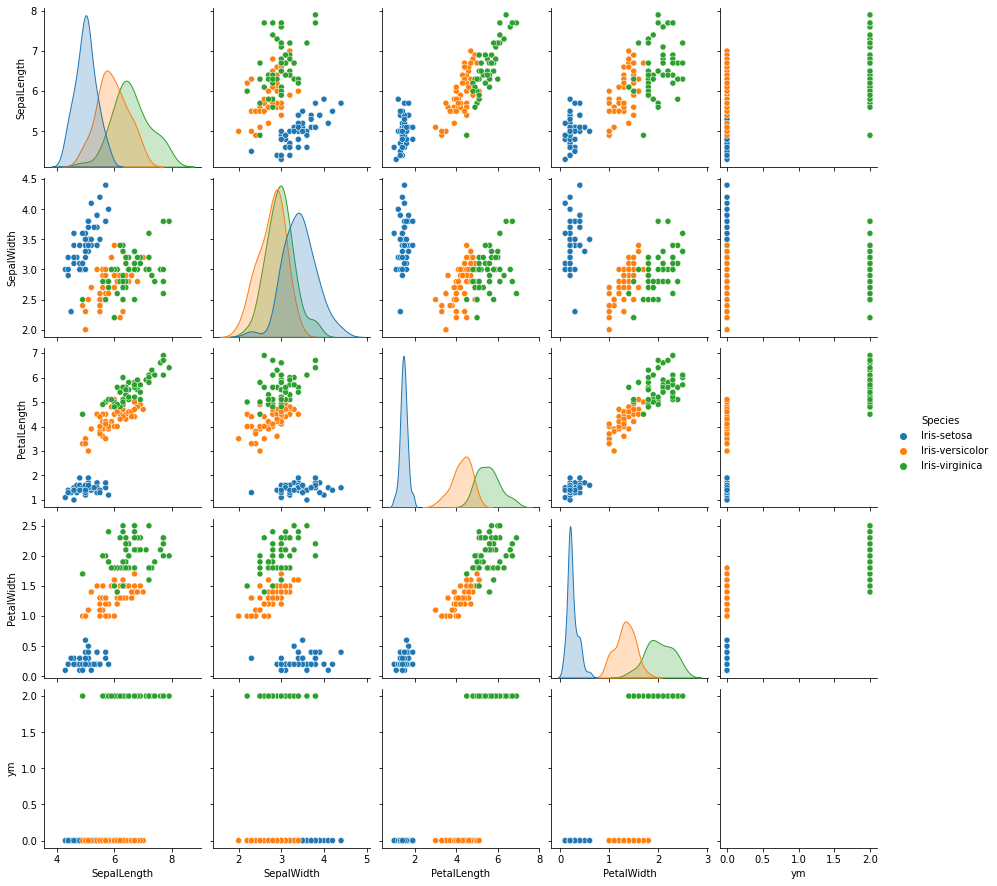

In [30]:
g = sns.pairplot(data, hue='Species'), 
#plt.show()

In [31]:
X = data.iloc[:, 0:4] # petal length and width
X
y = data.iloc[:, 5:6]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [32]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(X_train, Y_train)
scores = cross_val_score(tree_clf, X_train, Y_train, cv=5, scoring = "accuracy")
print('cross val Accuracy: %.3f' % np.mean(scores))

y_test_pred = tree_clf.predict(X_test)
print('test Accuracy: %.3f' % accuracy_score(Y_test, y_test_pred))

y_train_pred = tree_clf.predict(X_train)
print('train Accuracy: %.3f' % accuracy_score(Y_train, y_train_pred))

cross val Accuracy: 0.933
test Accuracy: 0.933
train Accuracy: 1.000
